<a href="https://colab.research.google.com/github/Yazielbaralc1/Mineria_de_Datos.phyton-/blob/main/PIA_AVANCE_BANKRUPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTING LIBRARIES

# General Libraries

import os
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from scipy.stats import norm
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings(action="ignore")

# Preprocessing Libraries

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

# Machine Learning Libraries

import sklearn
import xgboost as xgb
from sklearn import tree
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from imblearn.pipeline import Pipeline

from imblearn.over_sampling import SMOTE
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import classification_report
from mlxtend.classifier import StackingCVClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import recall_score, f1_score, roc_auc_score
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

Visualizamos los Datos
Concluimos que no exiten datos nulos en ninguna de nuestras columnas.

In [ ]:
df = pd.read_csv("data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

Con esta funcion checa columna por columna los datos repetidos existentes. 

In [ ]:
{column: len(df[column].unique()) for column in df.columns}

{' Accounts Receivable Turnover': 1593,
 ' After-tax Net Profit Growth Rate': 6246,
 ' After-tax net Interest Rate': 3604,
 ' Allocation rate per person': 6768,
 ' Average Collection Days': 5451,
 ' Borrowing dependency': 4338,
 ' CFO to Assets': 6819,
 ' Cash Flow Per Share': 1545,
 ' Cash Flow to Equity': 6819,
 ' Cash Flow to Liability': 6819,
 ' Cash Flow to Sales': 6819,
 ' Cash Flow to Total Assets': 6819,
 ' Cash Reinvestment %': 3599,
 ' Cash Turnover Rate': 4023,
 ' Cash flow rate': 5557,
 ' Cash/Current Liability': 6816,
 ' Cash/Total Assets': 6819,
 ' Contingent liabilities/Net worth': 1855,
 ' Continuous Net Profit Growth Rate': 6270,
 ' Continuous interest rate (after tax)': 3617,
 ' Current Asset Turnover Rate': 6261,
 ' Current Assets/Total Assets': 6819,
 ' Current Liabilities/Equity': 6819,
 ' Current Liabilities/Liability': 6627,
 ' Current Liability to Assets': 6819,
 ' Current Liability to Current Assets': 6819,
 ' Current Liability to Equity': 6819,
 ' Current Liab

Concluimos que la columna Non Flag Income contiene solo 1 dato, por lo tanto no entra en nuestras variables categóricas

Realizamos un Análisis Exploratorio de los datos.

In [ ]:
df=pd.read_csv('data.csv')
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),...,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,...,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.115001,0.190661,0.190633,0.190672,0.228813,0.323482,1.328641e+06,0.109091,0.184361,0.022408,0.847980,0.689146,0.689150,0.217639,5.508097e+09,1.566212e+06,0.264248,0.379677,4.032850e+05,8.376595e+06,0.630991,4.416337e+06,0.113177,0.886823,0.008783,...,0.522273,0.124095,3.592902e+06,3.715999e+07,0.090673,0.353828,0.277395,5.580680e+07,0.761599,0.735817,0.331410,5.416004e+07,0.934733,0.002549,0.029184,1.195856e+09,2.163735e+09,0.594006,2.471977e+09,0.671531,1.220121e+06,0.761599,0.331410,0.115645,0.649731,0.461849,0.593415,0.315582,0.031506,0.001173,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686

In [ ]:
df['No Banca Rota']=(df['Bankrupt?']==0).astype(int)
df['Banca Rota']=(df['Bankrupt?']==1).astype(int)
df['Empresas']=np.arange(1,len(df)+1)

df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),...,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,No Banca Rota,Banca Rota,Empresas
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.000000e+00,0.458143,7.250725e-04,0.000000,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,...,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,2.559237e-02,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469,0,1,1
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.000000e+00,0.461867,6.470647e-04,0.000000,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,...,1.383910e-03,0.056963,0.341106,0.289642,0.005210,0.308589,0.731975,0.329740,2.394682e-02,0.931065,0.002226,0.025516,1.065198e-04,7.700000e+09,0.593916,2.490000e+09,0.671570,0.468828,0.308589,0.329740,0.120916,0.641100,0.459001,0.567101,0.314163,0.047775,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794,0,1,2
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,2.361297e-04,2.550000e+07,0.458521,7.900790e-04,0.000000,0.177911,0.177911,0.193713,0.180581,0.307102,0.005944,0.092338,0.142803,0.022760,0.848094,0.689463,0.689470,0.217601,7.280000e+09,0.000396,0.264184,0.368913,0.011543,0.005348,0.629631,0.021248,0.207516,0.792484,0.005100,...,5.340000e+09,0.098162,0.3367

Radio actual
El coeficiente circulante , que simplemente divide los activos circulantes por el pasivo circulante, es uno de los coeficientes de liquidez primarios que se utilizan para evaluar la solidez financiera de una empresa. Evalúa la capacidad de una empresa para manejar todas sus obligaciones de deuda a corto plazo, midiendo la idoneidad de los recursos actuales de la empresa para cubrir todas sus obligaciones de deuda durante los próximos 12 meses. Una razón circulante más alta indica que la empresa tiene más liquidez. Generalmente, una razón corriente de 2 o más se considera saludable. Una relación de menos de 1 es una clara señal de advertencia.

Buscabamos una visualizacion de relacion la razon de liquidez con el flujo de caja o efectivo a pasivos.
En las primeras 70 empresas podemos ver una generosa concenctracion de datos por parte de los bancos rondan con un 46% con flujo de caja a efectivo y tambien estan tienen un 5% a 10% de liquidez.

Esta relacion podria segmentarse como determinante para deducir que un banco esta en riesgo de quiebra.



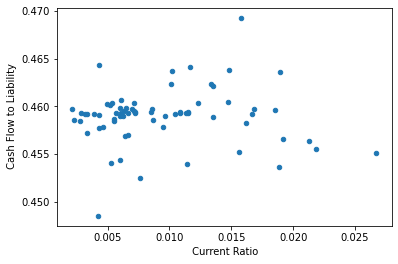

In [ ]:
df.head(70).plot.scatter(x=' Current Ratio' , y=' Cash Flow to Liability')

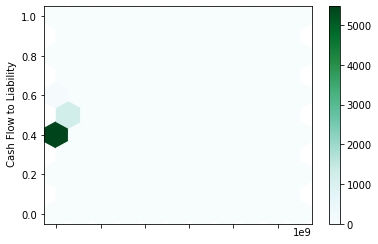

In [ ]:
df.plot.hexbin(x=' Current Ratio', y=' Cash Flow to Liability', gridsize=10)

In [ ]:
df.describe()


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),...,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,...,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.115001,0.190661,0.190633,0.190672,0.228813,0.323482,1.328641e+06,0.109091,0.184361,0.022408,0.847980,0.689146,0.689150,0.217639,5.508097e+09,1.566212e+06,0.264248,0.379677,4.032850e+05,8.376595e+06,0.630991,4.416337e+06,0.113177,0.886823,0.008783,...,0.522273,0.124095,3.592902e+06,3.715999e+07,0.090673,0.353828,0.277395,5.580680e+07,0.761599,0.735817,0.331410,5.416004e+07,0.934733,0.002549,0.029184,1.195856e+09,2.163735e+09,0.594006,2.471977e+09,0.671531,1.220121e+06,0.761599,0.331410,0.115645,0.649731,0.461849,0.593415,0.315582,0.031506,0.001173,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686

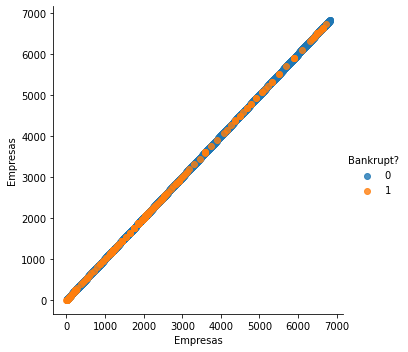

In [ ]:
sns.lmplot(x='Empresas', y='Empresas', hue='Bankrupt?', data=df.loc[df['Bankrupt?'].isin(['0', '1'])], fit_reg=False)

Aqui vemos nuestra distribucion de Datos de nuestra variable predictoria o binaria (YES/NO) de la cual podemos ver un sesgo en los datos hacia que 6599 no se considera en Banca Rota y solo un 220 de 6819 bancos se considera en Banca Rota.

In [ ]:
print(df['Bankrupt?'].value_counts())


0    6599
1     220
Name: Bankrupt?, dtype: int64


Viendolo en porcentaje, se cuentan los valores (0,1) considerado en baca rota o no entre todos los bancos de la base de datos.

In [ ]:
print('Finaciamiento Estable | No en Banca Rota: ', round(df['Bankrupt?'].value_counts()[0]/len(df) * 100,2), '% de los datos')
print('Financiamiento no Estable | En Banca Rota: ', round(df['Bankrupt?'].value_counts()[1]/len(df) * 100,2), '% de los datos')

Finaciamiento Estable | No en Banca Rota:  96.77 % de los datos
Financiamiento no Estable | En Banca Rota:  3.23 % de los datos


Para ver esta dicha distribucion de los datos:

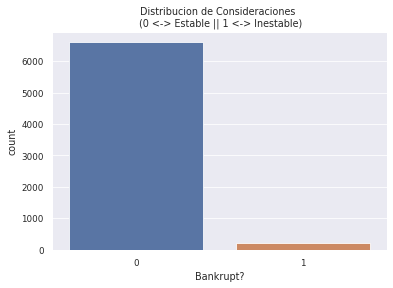

In [ ]:
sns.set_theme(context = 'paper')

plt.figure()
sns.countplot(df['Bankrupt?'])
plt.title('Distribucion de Consideraciones \n (0 <-> Estable || 1 <-> Inestable)')
plt.show()

Por lo tanto podemos ver una inestabilidad en la distribucion de los datos. Esto se concluye como un sesgo en los datos considerados como estables. Para esto se pueden usar diferentes métricas o técnicas para poder premuestrar esta dicha distribucion de los dato.

Esto es porque al usar la Regresion Logística, tenemos que generar calculos y variables de entrenamiento, asi como tambien las de testeo, por lo anto este algoritmo de entrenamiento podria calcular los datos erróneamente y queremos calcular las predicciones lo mas correctas psoibles.

Seguimos con nuestra esploracion de los datos. Una aplicacion inferencista mediante un histograma.


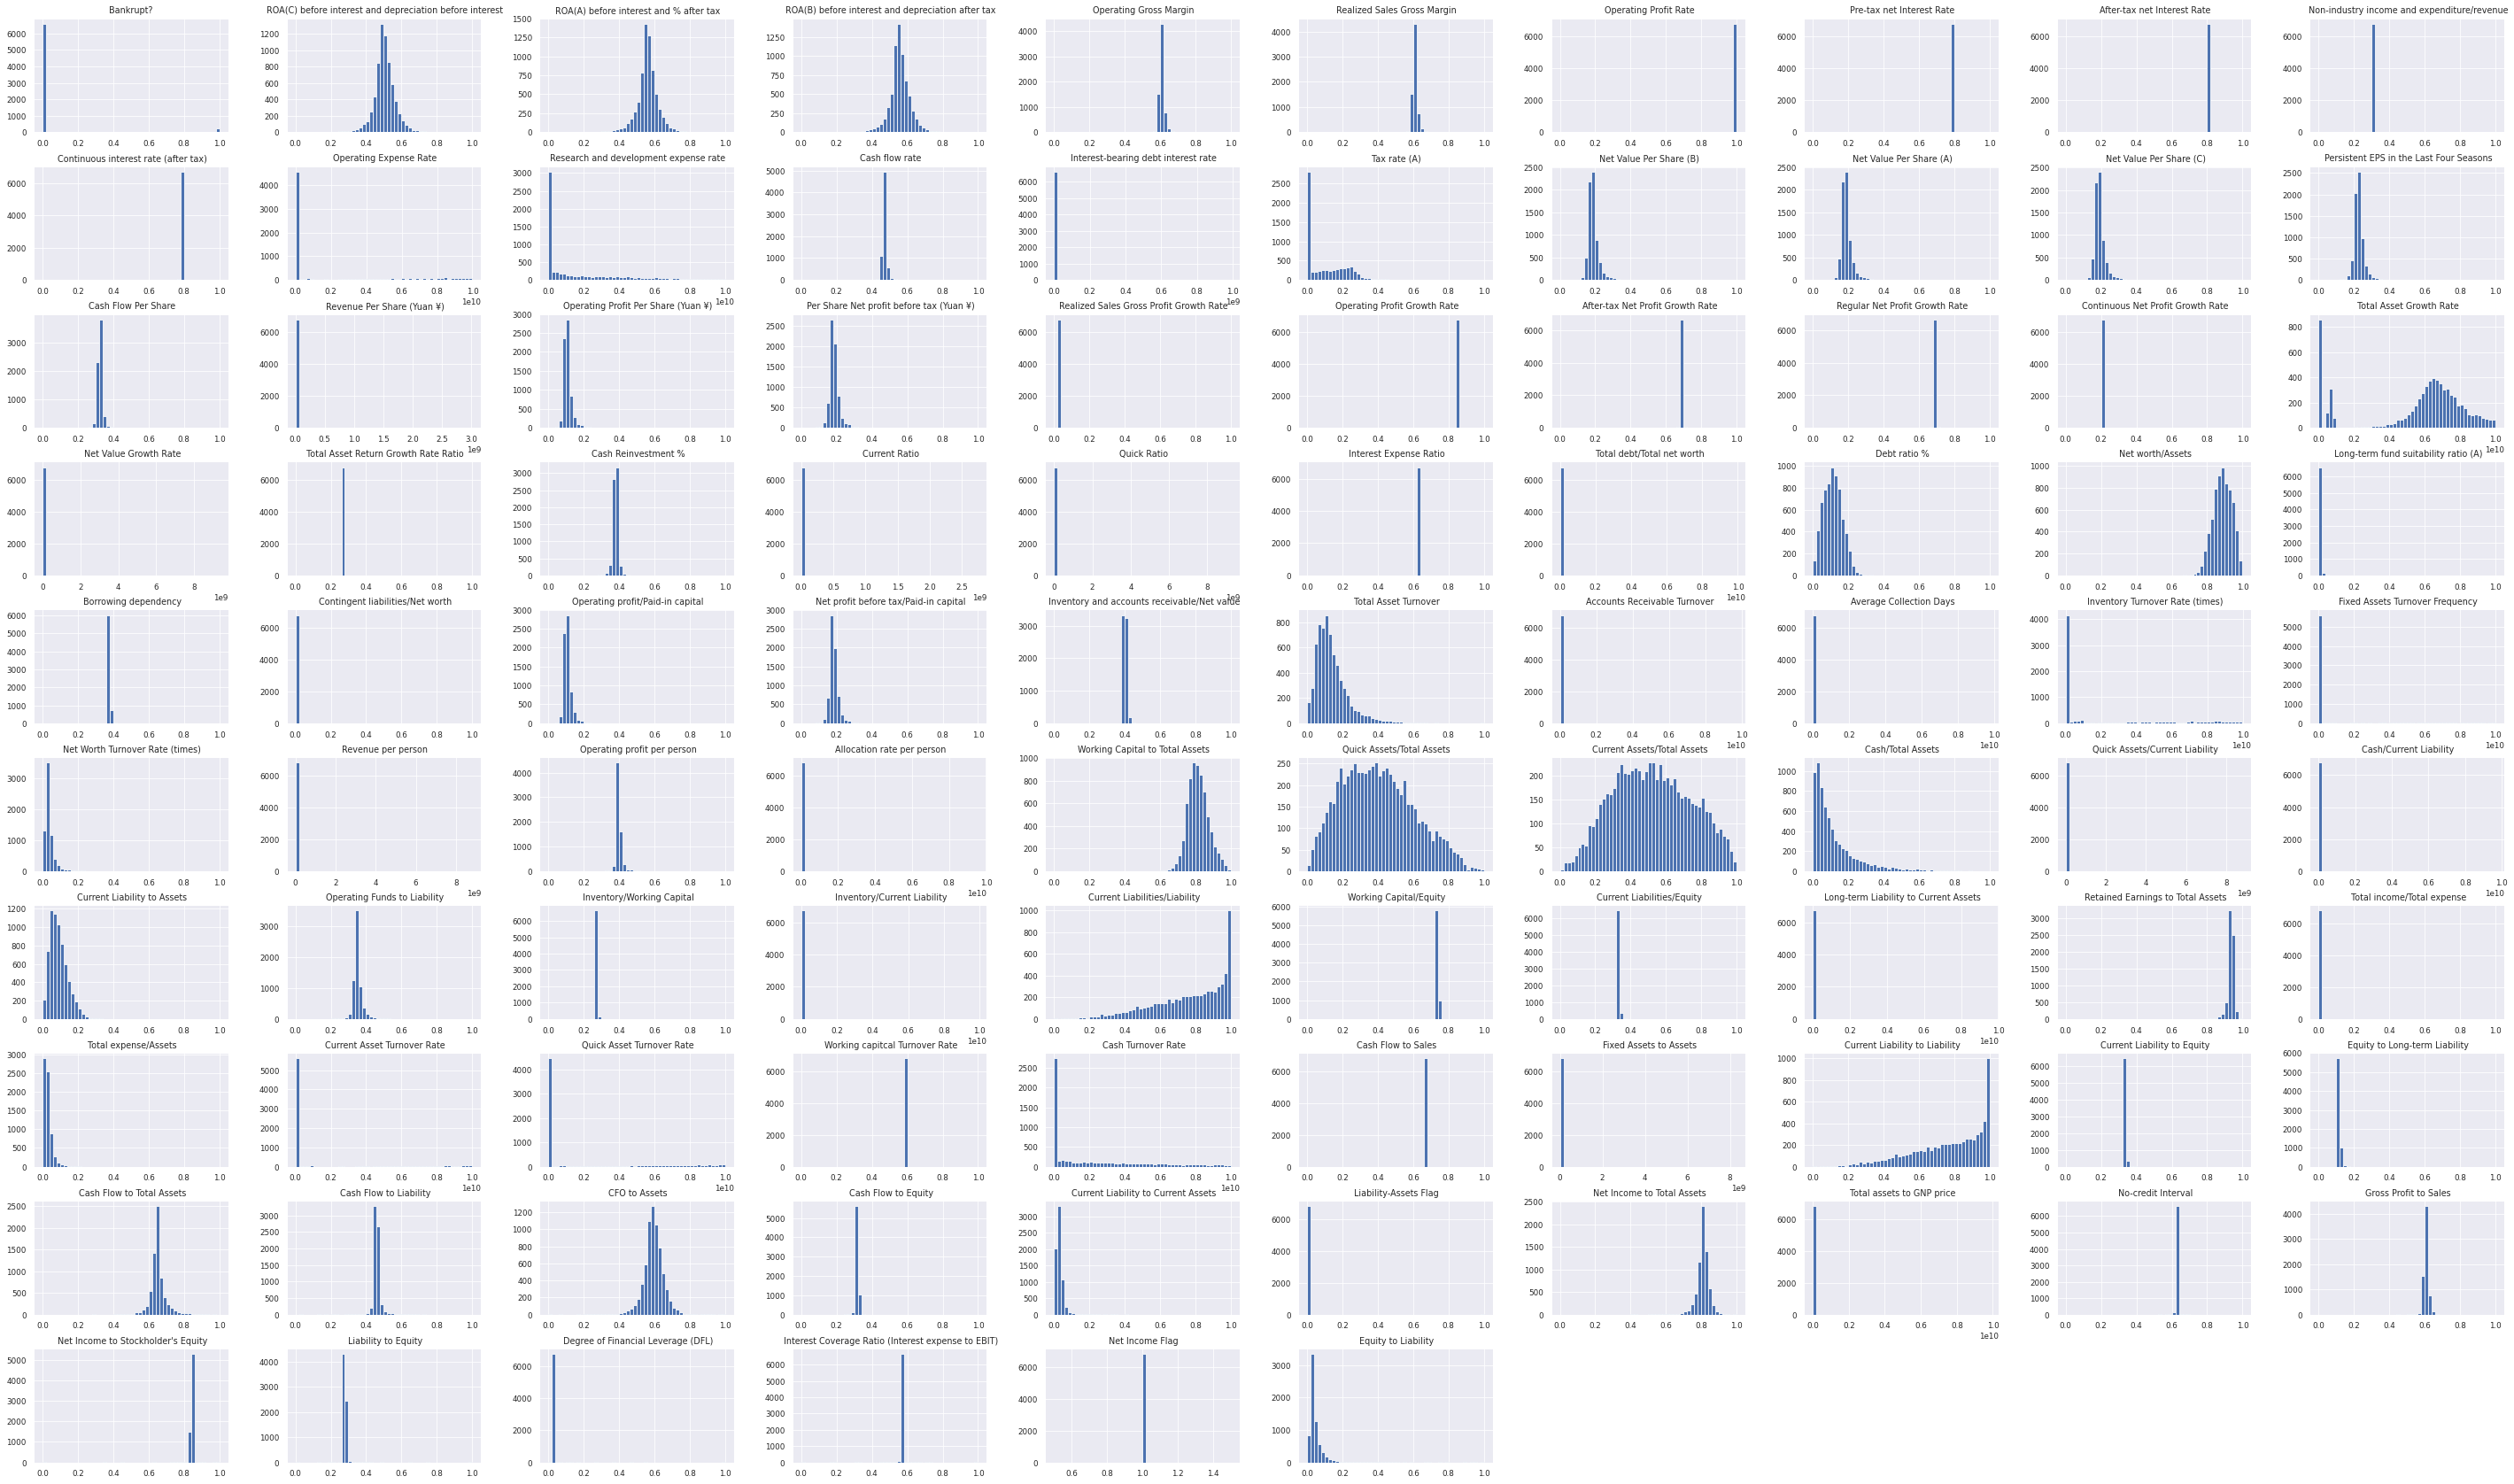

In [ ]:
df.hist(figsize = (50,30), bins = 50)
plt.show()

Aqui podemos ver las distribuciones de cada ratio de nuestra base de datos. Unos datos Rescatables son a simple vista


*   Los ROA generalmente se concentra en el 0.6.






Procedemos a realizar un exploracion o mapeo en la correlacion de nuestros datos.

In [ ]:
f,ax=plt.subplots(figsize = (200,200))
sns.heatmap(df.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Mapa de correlación')
plt.savefig('graph.png')
plt.show()

In [ ]:
X_entrenamiento, X_prueba, Y_entrenamiento, Y_prueba= train_test_split(df.iloc[:,1:97],df['Bankrupt?'], test_size=0.3)

Nuestra Variable de entrenamiento nos arrojo 4773 datos y 96 columnas.

In [ ]:
X_entrenamiento.shape

(4773, 96)

Modelamos nuestros datos con nuestras variables de entrenamiento.

Por otra parte, con nuestras variables de entrenamiento, prediciremos nuestra y, que en este caso queremos predecir cuantas empresas quebraran o estaran inestables.

Mediante eso, obtenemos un 96% de aceptacion de nuestras predicciones. 

In [ ]:
Relog= LogisticRegression()
Relog.fit(X_entrenamiento,Y_entrenamiento)

y_prediccion= Relog.predict(X_entrenamiento)
Relog.score(X_entrenamiento,Y_entrenamiento)*100

96.1659333752357

Veamos la prediccion de los datos con nuestra matriz de confusion.

En la cual de todos los datos que entrenamos con este modelo, 4587 son verdaderos negativos (Estables), 3 son verdaderos negativos (Inestables).

Errores en la calsificación son que existen 141 datos que son falsos negativos (Inestables) y 42 falsos verdaderos (Estables).



In [ ]:
metrics.confusion_matrix(Y_entrenamiento,y_prediccion)

array([[4587,   42],
       [ 141,    3]])

De acuerdo a nuetros datos:

*   Tenemos una precision del 97% en la  clasificacion de empresas estables.
*   Tenemos un precision del 7% en la clasificación de los datos de empresas inestables.



*   Tenemos un 2% de capacidad clasificatoria en las empresas estables.
*   Tenemos un 99% de capacidad clasificatoria en las empresas estables.

*  98% en nuestra calsificacion de empresas estables muy cercano a un resultado óptimo 
*   3% en nuestra clasificacion de empresas inestables 

*  El soporte es el número de apariciones reales de la clase en el conjunto de datos especificado. El apoyo desequilibrado en los datos de capacitación puede indicar debilidades estructurales en las puntuaciones informadas del clasificador y podría indicar la necesidad de un muestreo estratificado o un reequilibrio.








In [ ]:
print(metrics.classification_report(y_true= Y_entrenamiento, y_pred= y_prediccion))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4629
           1       0.07      0.02      0.03       144

    accuracy                           0.96      4773
   macro avg       0.52      0.51      0.51      4773
weighted avg       0.94      0.96      0.95      4773



Y ahora con nuestra prediccion de prueba, en la cual podemos ver 

In [ ]:
y_prediccion_prueba = Relog.predict(X_prueba)
metrics.confusion_matrix(y_true=Y_prueba,y_pred=y_prediccion_prueba)


array([[1949,   21],
       [  76,    0]])

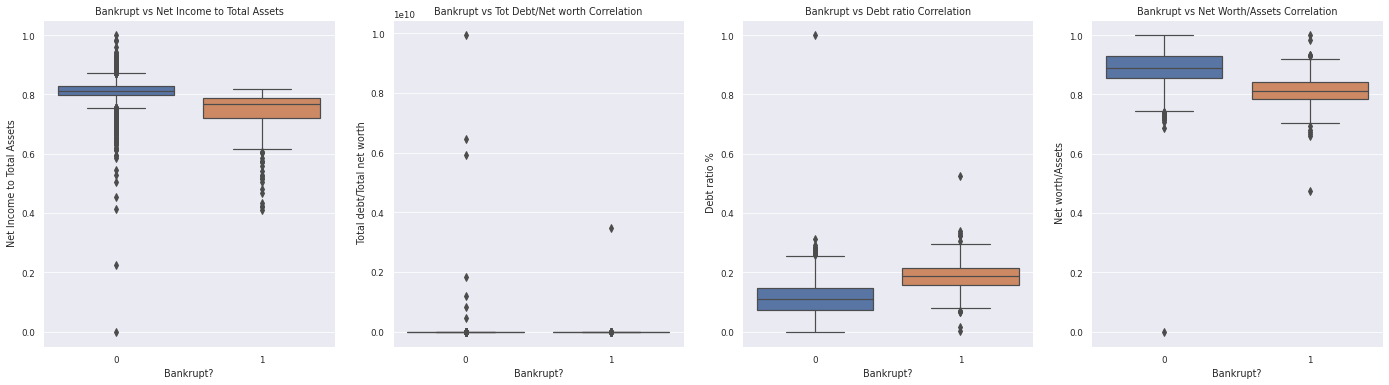

In [ ]:
# Plotting interesting features

f, axes = plt.subplots(ncols=4, figsize=(24,6))

sns.boxplot(x='Bankrupt?', y=" Net Income to Total Assets", data=df, ax=axes[0])
axes[0].set_title('Bankrupt vs Net Income to Total Assets')

sns.boxplot(x='Bankrupt?', y=" Total debt/Total net worth", data=df, ax=axes[1]) 
axes[1].set_title('Bankrupt vs Tot Debt/Net worth Correlation')


sns.boxplot(x='Bankrupt?', y=" Debt ratio %", data=df, ax=axes[2])
axes[2].set_title('Bankrupt vs Debt ratio Correlation')


sns.boxplot(x='Bankrupt?', y=" Net worth/Assets", data=df, ax=axes[3])  
axes[3].set_title('Bankrupt vs Net Worth/Assets Correlation') 

plt.show()

Podemos ver los outliers, por lo tanto procederemos a limpiar estos outliers.

Y veremos el resultado de eliminar los outliers.

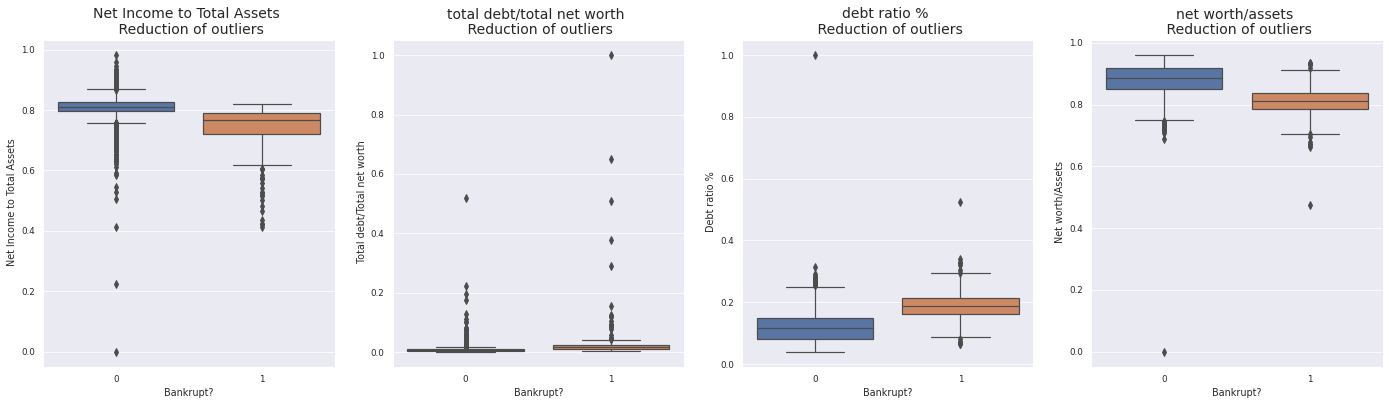

In [ ]:
f,(ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24,6))

# Boxplots with outliers removed

sns.boxplot(x="Bankrupt?", y=" Net Income to Total Assets", data=new_without_outliers,ax=ax1) 
ax1.set_title("Net Income to Total Assets \n Reduction of outliers", fontsize=14)

sns.boxplot(x="Bankrupt?", y=" Total debt/Total net worth", data=new_without_outliers,ax=ax2) 
ax2.set_title("total debt/total net worth \n Reduction of outliers", fontsize=14)

sns.boxplot(x="Bankrupt?", y=" Debt ratio %", data=new_without_outliers,ax=ax3) 
ax3.set_title("debt ratio % \n Reduction of outliers", fontsize=14)

sns.boxplot(x="Bankrupt?", y=' Net worth/Assets', data=new_without_outliers,ax=ax4) 
ax4.set_title("net worth/assets \n Reduction of outliers", fontsize=14)
        
plt.show()

Ahora veremos las distribuciones con tendencia a que las compañias quiebren

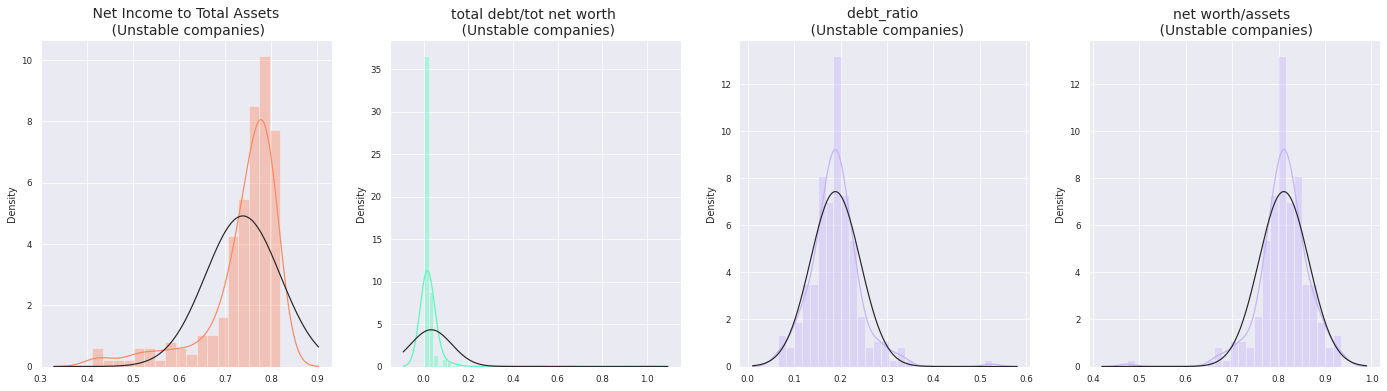

In [ ]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(24, 6))

cash_flow_rate = new_without_outliers[' Net Income to Total Assets'].loc[new_without_outliers['Bankrupt?'] == 1].values
sns.distplot(cash_flow_rate,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title(' Net Income to Total Assets \n (Unstable companies)', fontsize=14)

tot_debt_net = new_without_outliers[' Total debt/Total net worth'].loc[new_without_outliers['Bankrupt?'] == 1].values
sns.distplot(tot_debt_net ,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('total debt/tot net worth \n (Unstable companies)', fontsize=14)


debt_ratio = new_without_outliers[' Debt ratio %'].loc[new_without_outliers['Bankrupt?'] == 1].values
sns.distplot(debt_ratio,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('debt_ratio \n (Unstable companies)', fontsize=14)

net_worth_assets = new_without_outliers[' Net worth/Assets'].loc[new_without_outliers['Bankrupt?'] == 1].values
sns.distplot(net_worth_assets,ax=ax4, fit=norm, color='#C5B3F9')
ax4.set_title('net worth/assets \n (Unstable companies)', fontsize=14)

plt.show()

In [ ]:
# Stratified Cross Validation Splitting
X=df.drop(['Bankrupt?'],axis=1)
y=df['Bankrupt?']

sss = StratifiedKFold(n_splits=5, random_state=42, shuffle=False)

for train_index, test_index in sss.split(X,y):
    
    print("Train:", train_index, "Test:", test_index)
    X_train_sm, X_val_sm = X.iloc[train_index], X.iloc[test_index]
    y_train_sm, y_val_sm = y.iloc[train_index], y.iloc[test_index]

# Check the Distribution of the labels


# Turn into an array
X_train_sm = X_train_sm.values
X_val_sm = X_val_sm.values
y_train_sm = y_train_sm.values
y_val_sm = y_val_sm.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(y_train_sm, return_counts=True)
test_unique_label, test_counts_label = np.unique(y_val_sm, return_counts=True)
print('-' * 84)

print('Label Distributions: \n')
print(train_counts_label/ len(y_train_sm))
print(test_counts_label/ len(y_val_sm))

Train: [1104 1118 1132 ... 6816 6817 6818] Test: [   0    1    2 ... 1383 1384 1385]
Train: [   0    1    2 ... 6816 6817 6818] Test: [1104 1118 1132 ... 2796 2797 2798]
Train: [   0    1    2 ... 6816 6817 6818] Test: [1860 1861 1862 ... 4136 4137 4138]
Train: [   0    1    2 ... 6816 6817 6818] Test: [2100 2147 2148 ... 5475 5476 5477]
Train: [   0    1    2 ... 5475 5476 5477] Test: [3749 3908 4071 ... 6816 6817 6818]
------------------------------------------------------------------------------------
Label Distributions: 

[0.96774194 0.03225806]
[0.96771827 0.03228173]
